# Unsupervised topic classification

https://github.com/captain500/elmundodelosdatos/blob/main/3_topic_modeling_gensim/asignacion_topicos.ipynb

In [1]:
import json, re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer

In [13]:
from share import years
set_yearly_words = []
for year_label in years:
    frequent_words = pd.read_csv(f'/Users/almacuevas/work_projects/conferencias_matutinas_amlo/spacy_graph_metainfo/world_data_lemma_set_{year_label}.csv')
    set_yearly_words.append(' '.join(frequent_words['term']))
set_yearly_words_df = pd.DataFrame({'text': set_yearly_words, 'year':years})
set_yearly_words_df

,text,year
0,gracias días buenos presidente inaudible caso ...,2018
1,gracias presidente días buenos señor inaudible...,2019
2,presidente gracias días buenos señor caso buen...,2020
3,presidente gracias días señor buenos bueno mil...,2021
4,presidente gracias días buenos señor bueno ina...,2022
5,presidente gracias bueno días señor buenos mil...,2023


In [14]:
def limpiar_texto(texto):
    """
    Función para realizar una limpieza de un texto dado.
    """
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))
    # Eliminado las palabras que tengo un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto

In [15]:
set_yearly_words_df["Tokens"] = set_yearly_words_df.text.apply(limpiar_texto)
print(set_yearly_words_df.Tokens[0])
set_yearly_words_df.head()

gracias días buenos presidente inaudible caso información seguridad presupuesto robo tema día ley señor corrupción reforma país asunto sistema pemex pesos ciudadanos tiempo federal investigación derecho manera pública semana gente millones parte combustible importante estrategia momento general problema trabajadores proceso pueblo públicos año funcionarios casos judicial años ejemplo cabo instalaciones nacional delitos secretario propósito acuerdo cambio política trabajo ciudad reunión santa estado dictamen elementos nueva nuevo bueno gobernadores hecho compromiso cámara dinero marina ejecutivo diputados delito tipo público primera procedimiento opinión sueldos forma vez proyecto apoyo buen salud justicia cosas transparencia bonos unidos responsabilidad términos grupo atención personas diario temas estados decisión mexicanos coordinaciones recursos preguntas aeropuerto educativa situación grave periodistas ductos medios defensa senado policía energía seguro corte pipas policías austeri

,text,year,Tokens
0,gracias días buenos presidente inaudible caso ...,2018,gracias días buenos presidente inaudible caso ...
1,gracias presidente días buenos señor inaudible...,2019,gracias presidente días buenos señor inaudible...
2,presidente gracias días buenos señor caso buen...,2020,presidente gracias días buenos señor caso buen...
3,presidente gracias días señor buenos bueno mil...,2021,presidente gracias días señor buenos bueno mil...
4,presidente gracias días buenos señor bueno ina...,2022,presidente gracias días buenos señor bueno ina...


In [16]:
tokenizer = ToktokTokenizer()
set_yearly_words_df["Tokens"] = set_yearly_words_df.Tokens.apply(tokenizer.tokenize)
print(set_yearly_words_df.Tokens[0])
set_yearly_words_df.head()

['gracias', 'días', 'buenos', 'presidente', 'inaudible', 'caso', 'información', 'seguridad', 'presupuesto', 'robo', 'tema', 'día', 'ley', 'señor', 'corrupción', 'reforma', 'país', 'asunto', 'sistema', 'pemex', 'pesos', 'ciudadanos', 'tiempo', 'federal', 'investigación', 'derecho', 'manera', 'pública', 'semana', 'gente', 'millones', 'parte', 'combustible', 'importante', 'estrategia', 'momento', 'general', 'problema', 'trabajadores', 'proceso', 'pueblo', 'públicos', 'año', 'funcionarios', 'casos', 'judicial', 'años', 'ejemplo', 'cabo', 'instalaciones', 'nacional', 'delitos', 'secretario', 'propósito', 'acuerdo', 'cambio', 'política', 'trabajo', 'ciudad', 'reunión', 'santa', 'estado', 'dictamen', 'elementos', 'nueva', 'nuevo', 'bueno', 'gobernadores', 'hecho', 'compromiso', 'cámara', 'dinero', 'marina', 'ejecutivo', 'diputados', 'delito', 'tipo', 'público', 'primera', 'procedimiento', 'opinión', 'sueldos', 'forma', 'vez', 'proyecto', 'apoyo', 'buen', 'salud', 'justicia', 'cosas', 'transpa

,text,year,Tokens
0,gracias días buenos presidente inaudible caso ...,2018,"[gracias, días, buenos, presidente, inaudible,..."
1,gracias presidente días buenos señor inaudible...,2019,"[gracias, presidente, días, buenos, señor, ina..."
2,presidente gracias días buenos señor caso buen...,2020,"[presidente, gracias, días, buenos, señor, cas..."
3,presidente gracias días señor buenos bueno mil...,2021,"[presidente, gracias, días, señor, buenos, bue..."
4,presidente gracias días buenos señor bueno ina...,2022,"[presidente, gracias, días, buenos, señor, bue..."


In [17]:
STOPWORDS = set(stopwords.words("spanish"))

def filtrar_stopword_digitos(tokens):
    """
    Filtra stopwords y digitos de una lista de tokens.
    """
    return [token for token in tokens if token not in STOPWORDS and not token.isdigit()]

set_yearly_words_df["Tokens"] = set_yearly_words_df.Tokens.apply(filtrar_stopword_digitos)

set_yearly_words_df.head()

,text,year,Tokens
0,gracias días buenos presidente inaudible caso ...,2018,"[gracias, días, buenos, presidente, inaudible,..."
1,gracias presidente días buenos señor inaudible...,2019,"[gracias, presidente, días, buenos, señor, ina..."
2,presidente gracias días buenos señor caso buen...,2020,"[presidente, gracias, días, buenos, señor, cas..."
3,presidente gracias días señor buenos bueno mil...,2021,"[presidente, gracias, días, señor, buenos, bue..."
4,presidente gracias días buenos señor bueno ina...,2022,"[presidente, gracias, días, buenos, señor, bue..."


In [18]:
stemmer = SnowballStemmer("spanish")

def stem_palabras(tokens):
    """
    Reduce cada palabra de una lista dada a su raíz.
    """
    return [stemmer.stem(token) for token in tokens]

set_yearly_words_df["Tokens"] = set_yearly_words_df.Tokens.apply(stem_palabras)

set_yearly_words_df.head()

,text,year,Tokens
0,gracias días buenos presidente inaudible caso ...,2018,"[graci, dias, buen, president, inaud, cas, inf..."
1,gracias presidente días buenos señor inaudible...,2019,"[graci, president, dias, buen, señor, inaud, c..."
2,presidente gracias días buenos señor caso buen...,2020,"[president, graci, dias, buen, señor, cas, bue..."
3,presidente gracias días señor buenos bueno mil...,2021,"[president, graci, dias, señor, buen, buen, mi..."
4,presidente gracias días buenos señor bueno ina...,2022,"[president, graci, dias, buen, señor, buen, in..."


## Part II: Topics

In [22]:
df = set_yearly_words_df

In [23]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import random
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [24]:
diccionario = Dictionary(df.Tokens)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 20549


In [25]:
diccionario.filter_extremes(no_below=2, no_above = 0.8)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 6723


In [29]:
# Creamos el corpus
corpus = [diccionario.doc2bow(noticia) for noticia in df.Tokens]

# Mostramos el BOW de una noticia representado
# como una lista de tuplas (ID, frecuencia)
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)]


# LDA model construction

In [75]:
lda = LdaModel(corpus=corpus, id2word=diccionario,
               num_topics=50, random_state=42,
               chunksize=1000, passes=10, alpha='auto')

In [76]:
topicos = lda.print_topics(num_words=5, num_topics=50)
for topico in topicos:
    print(topico)

(0, '0.000*"psicolog" + 0.000*"tomograf" + 0.000*"epidem" + 0.000*"sudcalifornian" + 0.000*"ultraderech"')
(1, '0.009*"desfigur" + 0.009*"clan" + 0.008*"autoestim" + 0.008*"cocher" + 0.006*"electrocardiogram"')
(2, '0.000*"psicolog" + 0.000*"aplan" + 0.000*"apapach" + 0.000*"caduc" + 0.000*"disident"')
(3, '0.000*"psicolog" + 0.000*"masculin" + 0.000*"desgast" + 0.000*"cep" + 0.000*"sustraid"')
(4, '0.000*"psicolog" + 0.000*"desgast" + 0.000*"paramed" + 0.000*"inmuniz" + 0.000*"caduc"')
(5, '0.000*"psicolog" + 0.000*"desgast" + 0.000*"masculin" + 0.000*"epidem" + 0.000*"hidrolog"')
(6, '0.000*"psicolog" + 0.000*"masculin" + 0.000*"eman" + 0.000*"epidem" + 0.000*"vespertin"')
(7, '0.000*"psicolog" + 0.000*"caduc" + 0.000*"epidem" + 0.000*"masculin" + 0.000*"desgast"')
(8, '0.000*"psicolog" + 0.000*"masculin" + 0.000*"aplan" + 0.000*"sustraid" + 0.000*"tomograf"')
(9, '0.001*"psicolog" + 0.001*"desgast" + 0.001*"masculin" + 0.001*"epidem" + 0.001*"aplan"')
(10, '0.000*"desgast" + 0.000*"

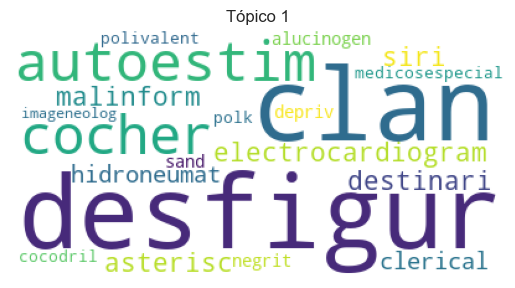

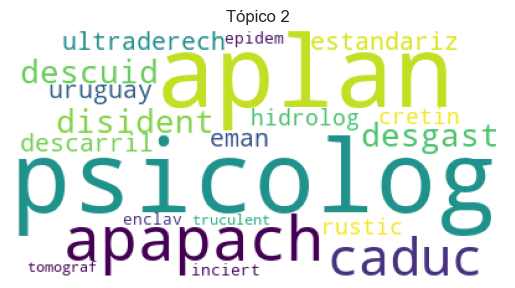

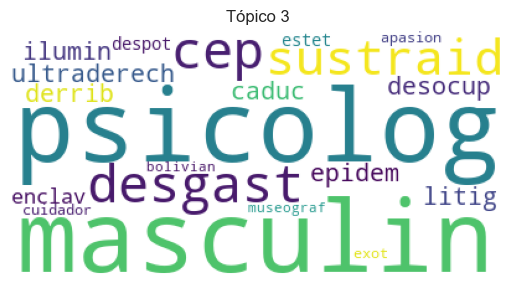

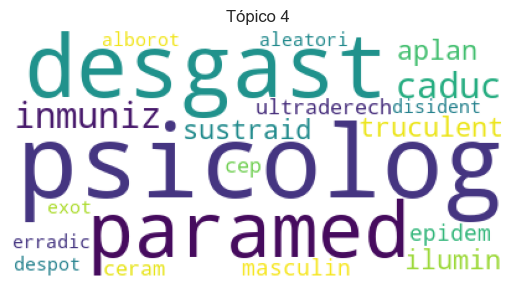

In [77]:
for i in range(1, 5):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0)
               .fit_words(dict(lda.show_topic(i, 20))))
    plt.axis("off")
    plt.title("Tópico " + str(i))
    plt.show()

# Define the topics per year

In [83]:
indice_noticia = 0
noticia = df.iloc[indice_noticia]
print("Titular: " + noticia.year)
print(noticia.text)

Titular: 2018
gracias días buenos presidente inaudible caso información seguridad presupuesto robo tema día ley señor corrupción reforma país asunto sistema pemex pesos ciudadanos tiempo federal investigación derecho manera pública semana gente millones parte combustible importante estrategia momento general problema trabajadores proceso pueblo públicos año funcionarios casos judicial años ejemplo cabo instalaciones nacional delitos secretario propósito acuerdo cambio política trabajo ciudad reunión santa estado dictamen elementos nueva nuevo bueno gobernadores hecho compromiso cámara dinero marina ejecutivo diputados delito tipo público primera procedimiento opinión sueldos forma vez proyecto apoyo buen salud justicia cosas transparencia bonos unidos responsabilidad términos grupo atención personas diario temas estados decisión mexicanos coordinaciones recursos preguntas aeropuerto educativa situación grave periodistas ductos medios defensa senado policía energía seguro corte pipas po

In [84]:
indice_noticia

0

In [85]:
bow_noticia = corpus[indice_noticia]
distribucion_noticia = lda[bow_noticia]
bow_noticia[0:10]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1)]

In [86]:
# Indices de los topicos mas significativos
dist_indices = [topico[0] for topico in lda[bow_noticia]]
# Contribucion de los topicos mas significativos
dist_contrib = [topico[1] for topico in lda[bow_noticia]]

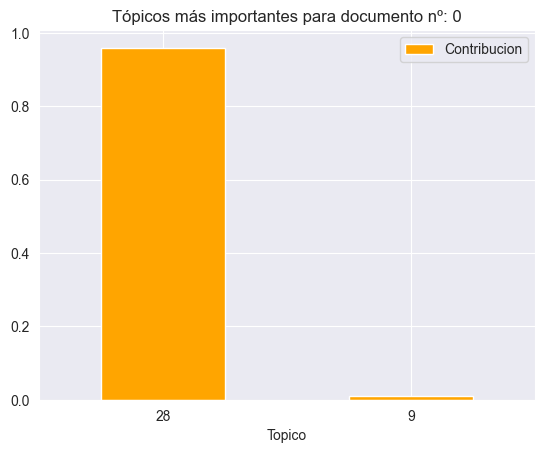

In [87]:
distribucion_topicos = pd.DataFrame({'Topico':dist_indices,'Contribucion':dist_contrib })
distribucion_topicos.sort_values('Contribucion', ascending=False, inplace=True)
ax = distribucion_topicos.plot.bar(y='Contribucion',x='Topico', rot=0, color="orange",
                                   title = "Tópicos más importantes para documento nº: " + str(indice_noticia))

In [88]:
for ind, topico in distribucion_topicos.iterrows():
    print("*** Tópico: " + str(int(topico.Topico)) + " ***")
    palabras = [palabra[0] for palabra in lda.show_topic(topicid=int(topico.Topico))]
    palabras = ', '.join(palabras)
    print(palabras, "\n")

*** Tópico: 28 ***
naim, postrevolucionari, debacl, ters, estefany, fantasi, crescenci, pompe, confeti, directric 

*** Tópico: 9 ***
psicolog, desgast, masculin, epidem, aplan, caduc, ilumin, eman, inmuniz, tomograf 



In [74]:
lda.save("articulos.model")
diccionario.save("articulos.dictionary")